# Практика

Необходимо предсказать биологический ответ молекул (столбец 'Activity') по их химическому составу (столбцы D1-D1776).

In [19]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные моделиё
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [20]:
#Загружаем данные
data = pd.read_csv('data/_train_sem09 (1).csv')
display(data.head())

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Так как предварительная обработка не требуется, пропускаем этот этап.

Смотрим на сбалансированность классов:

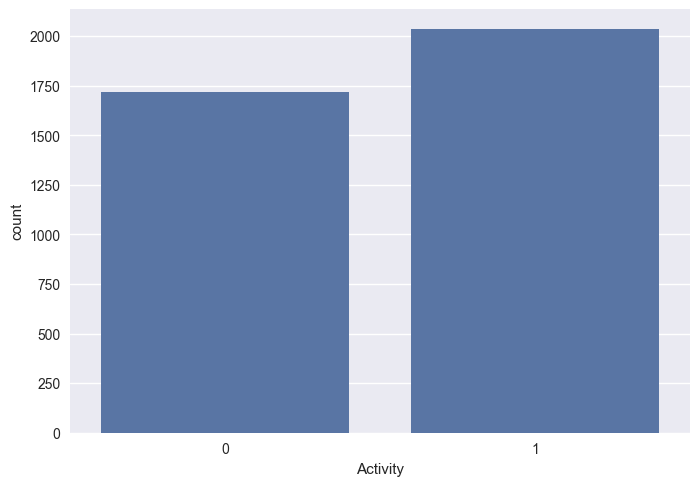

In [21]:
sns.countplot(data=data, x='Activity');

Создаем матрицу наблюдений $X$ и вектор ответов $y$.

In [22]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

Разделяем выборку на тренировочную и тестовую в соотношении 80/20. Для сохранения соотношений целевого признака используем параметр stratify (стратифицированное разбиение). 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

### **Логистическая регрессия** 

In [40]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(max_iter=500)

#Обучаем модель
log_reg.fit(X_train, y_train)

#Делаем предсказание f1-score на тренировочной и тестовой выборках
y_train_pred = log_reg.predict(X_train)
print('f1_score на тренировочной выборке: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = log_reg.predict(X_test)
print('f1_score на тестовой выборке: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тренировочной выборке: 0.89
f1_score на тестовой выборке: 0.78


### GridSearchSV для логистической регрессии

In [41]:
#Импортируем библиотеку 
from sklearn.model_selection import GridSearchCV

In [42]:
#Указываем искомые гиперпараметры в виде словаря 
param_grid = [
    {'penalty': ['l2', 'none'], #тип регуляризации
     'solver': ['lbfgs', 'sag'], #алгоритм оптимизации
     'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, #уровень силы регуляризации
    {'penalty': ['l1', 'l2'],
     'solver': ['liblinear', 'saga'],
     'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]

#Вызываем класс GridSearchCV
grid_search_log_reg = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv = 5,
    n_jobs = -1
)

# %time - замер времени
%time grid_search_log_reg.fit(X_train, y_train)

#Делаем предсказание
y_test_pred = grid_search_log_reg.predict(X_test)

#Выводим наилучшую найденную комбинацию гиперпараметров и метрику
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения гиперпараметров: {}'.format(grid_search_log_reg.best_params_))


c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
70 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files (x86)

CPU times: total: 27.9 s
Wall time: 5min 47s
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'C': 0.3, 'penalty': 'l1', 'solver': 'saga'}


c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


При помощи GridSearchCV не удалось улучшить целевую метрику на тествой выборке.

### RandomizedSearchCV для логистической регрессии


In [43]:
#Импортируем библиотеку
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Указываем искомые гиперпараметры в виде словаря 
param_distributions = [{'penalty': ['l2', 'none'],
                       'solver': ['lbfgs', 'sag'],
                       'C': list(np.linspace(0.01, 1, 10, dtype=float))},
                       {'penalty': ['l1', 'l2'],
                        'solver': ['liblinear', 'saga'],
                        'C': list(np.linspace(0.01, 1, 10, dtype=float))}
                       ]

#Вызываем класс RandomizedSearchCV
random_search_log_reg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    cv = 5,
    n_iter = 50,
    n_jobs = -1 
)

%time random_search_log_reg.fit(X_train, y_train)

#Делаем предсказание
y_test_pred = random_search_log_reg.predict(X_test)

#Выводим наилучшую найденную комбинацию гиперпараметров и метрику
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Наилучшие значения гиперпараметров: {}'.format(random_search_log_reg.best_params_))

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
70 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "c:\Program Files (x86)\Python\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "c:\Program Files (x86)

CPU times: total: 3.16 s
Wall time: 4min 33s
f1_score на тестовом наборе: 0.78
Наилучшие значения гиперпараметров: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.45}


При помощи RandomizedSearchCV не удалось улучшить целевую метрику на тествой выборке. Но данный метод отработал быстрее, чем GridSearchCV.

### HYPEROPT для логистической регрессии